# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## **Load Dataset**

In [2]:
data = pd.read_csv("/kaggle/input/employee-attrition-prediction/HR_dataset.csv")

In [3]:
data.head(5)

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,0.38,0.53,2,157.0,3.0,0,1,0,sales,low
1,0.80,0.86,5,262.0,6.0,0,1,0,sales,medium
2,0.11,0.88,7,272.0,4.0,0,1,0,sales,medium
3,0.72,0.87,5,223.0,5.0,0,1,0,sales,low
4,0.37,0.52,2,159.0,3.0,0,1,0,sales,low


In [4]:
data.tail(3)

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
14996,0.37,0.53,2,143.0,3.0,0,1,0,support,low
14997,0.11,0.96,6,280.0,4.0,0,1,0,support,low
14998,0.37,0.52,2,158.0,3.0,0,1,0,support,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14028 non-null  float64
 1   last_performance_rating   14661 non-null  float64
 2   number_of_projects        14999 non-null  int64  
 3   avg_monthly_hours         14757 non-null  float64
 4   years_at_company          14650 non-null  float64
 5   had_work_accident         14999 non-null  int64  
 6   has_left_company          14999 non-null  int64  
 7   promoted_in_last_5_years  14999 non-null  int64  
 8   Department                14999 non-null  object 
 9   salary_level              14999 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years
count,14028.000000,14661.000000,14999.000000,14757.000000,14650.000000,14999.000000,14999.000000,14999.000000
mean,0.608705,0.715844,3.803054,201.080572,3.506621,0.144610,0.238083,0.021268
std,0.249662,0.171177,1.232592,49.994942,1.467696,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.430000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.shape

(14999, 10)

In [8]:
data.count()

satisfaction_level          14028
last_performance_rating     14661
number_of_projects          14999
avg_monthly_hours           14757
years_at_company            14650
had_work_accident           14999
has_left_company            14999
promoted_in_last_5_years    14999
Department                  14999
salary_level                14999
dtype: int64

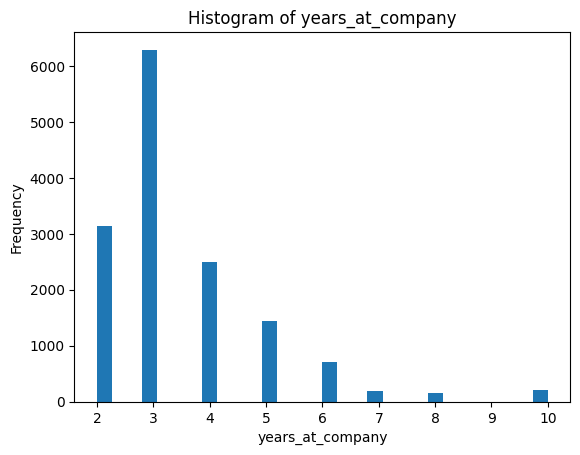

In [9]:
plt.hist(data['years_at_company'], bins=30)
plt.xlabel('years_at_company')
plt.ylabel('Frequency')
plt.title('Histogram of years_at_company')
plt.show()

# **EDA**

# **Check Duplicates and Remove duplicates**

In [10]:
duplicate=data.duplicated()
print(duplicate.sum())

2473


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12526 entries, 0 to 14986
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        11555 non-null  float64
 1   last_performance_rating   12188 non-null  float64
 2   number_of_projects        12526 non-null  int64  
 3   avg_monthly_hours         12284 non-null  float64
 4   years_at_company          12177 non-null  float64
 5   had_work_accident         12526 non-null  int64  
 6   has_left_company          12526 non-null  int64  
 7   promoted_in_last_5_years  12526 non-null  int64  
 8   Department                12526 non-null  object 
 9   salary_level              12526 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 1.1+ MB


# **Check and Fill Null values**

In [13]:
data.isnull().sum()

satisfaction_level          971
last_performance_rating     338
number_of_projects            0
avg_monthly_hours           242
years_at_company            349
had_work_accident             0
has_left_company              0
promoted_in_last_5_years      0
Department                    0
salary_level                  0
dtype: int64

In [14]:
med = np.nanmedian(data['avg_monthly_hours'])
data['avg_monthly_hours'] = data['avg_monthly_hours'].fillna(med)


In [15]:
med = np.nanmedian(data['satisfaction_level'])
data['satisfaction_level'] = data['satisfaction_level'].fillna(med)

In [16]:
# Calculate the median of the 'number_of_projects' column
med = np.nanmedian(data['number_of_projects'])

# Fill NaN values with the median and assign it back to the DataFrame
data['number_of_projects'] = data['number_of_projects'].fillna(med)


In [17]:
# Calculate the median of the 'years_at_company' column
med = np.nanmedian(data['years_at_company'])

# Fill NaN values with the median
data['years_at_company'] = data['years_at_company'].fillna(med)

In [18]:
# Calculate the median of the 'last_performance_rating' column
med = np.nanmedian(data['last_performance_rating'])

# Fill NaN values with the median
data['last_performance_rating'] = data['last_performance_rating'].fillna(med)

In [19]:
data.isnull().sum()

satisfaction_level          0
last_performance_rating     0
number_of_projects          0
avg_monthly_hours           0
years_at_company            0
had_work_accident           0
has_left_company            0
promoted_in_last_5_years    0
Department                  0
salary_level                0
dtype: int64

# **Convert Non-numeric features to Numeric**

In [20]:
# Encoding categorical features if they are not already encoded
data['Department'] = data['Department'].map({'product_mng':9, 'RandD':8, 'marketing':7, 'IT':6,
                                             'management':5, 'accounting':4, 'hr':3,
                                             'technical':2, 'support':1, 'sales':0})

data['salary_level'] = data['salary_level'].map({'high':2, 'medium':1, 'low':0})


In [21]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation of the target feature with other features
print(correlation_matrix['has_left_company'].sort_values(ascending=False))


has_left_company            1.000000
years_at_company            0.179085
avg_monthly_hours           0.068868
number_of_projects          0.030070
last_performance_rating     0.013266
Department                 -0.023345
promoted_in_last_5_years   -0.047018
salary_level               -0.118230
had_work_accident          -0.125781
satisfaction_level         -0.360202
Name: has_left_company, dtype: float64


In [22]:
data.dtypes

satisfaction_level          float64
last_performance_rating     float64
number_of_projects            int64
avg_monthly_hours           float64
years_at_company            float64
had_work_accident             int64
has_left_company              int64
promoted_in_last_5_years      int64
Department                    int64
salary_level                  int64
dtype: object

In [23]:
data.head(5)

,satisfaction_level,last_performance_rating,number_of_projects,avg_monthly_hours,years_at_company,had_work_accident,has_left_company,promoted_in_last_5_years,Department,salary_level
0,0.38,0.53,2,157.0,3.0,0,1,0,0,0
1,0.80,0.86,5,262.0,6.0,0,1,0,0,1
2,0.11,0.88,7,272.0,4.0,0,1,0,0,1
3,0.72,0.87,5,223.0,5.0,0,1,0,0,0
4,0.37,0.52,2,159.0,3.0,0,1,0,0,0


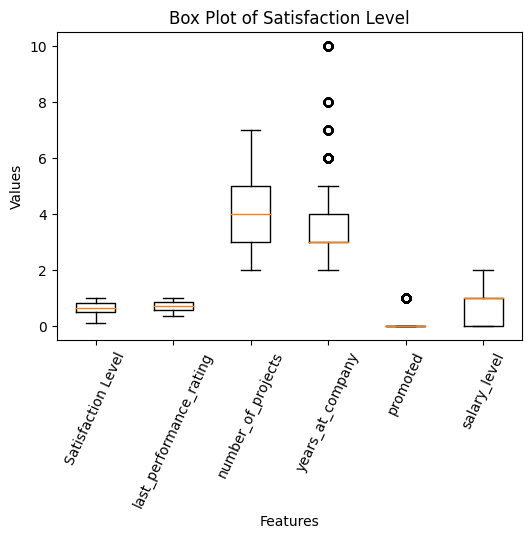

In [24]:
plt.figure(figsize=(6, 4))  # Set figure size
plt.boxplot([data['satisfaction_level'],data['last_performance_rating'],data['number_of_projects'],data['years_at_company'],data['promoted_in_last_5_years'],data['salary_level']])
# Customize the plot
plt.title('Box Plot of Satisfaction Level')  # Set the title
plt.xticks([1,2,3,4,5,6], ['Satisfaction Level', 'last_performance_rating','number_of_projects','years_at_company','promoted', 'salary_level'] ,rotation=65)
plt.xlabel('Features')
plt.ylabel('Values')
#plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

# **Remove Outlier**

In [25]:
# Calculate Q1, Q3, and IQR
Q1 = data['years_at_company'].quantile(0.25)
Q3 = data['years_at_company'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data['years_at_company'] < (Q1 - 1.5 * IQR)) | (data['years_at_company'] > (Q3 + 1.5 * IQR))

# Remove outliers
data = data[~outliers]

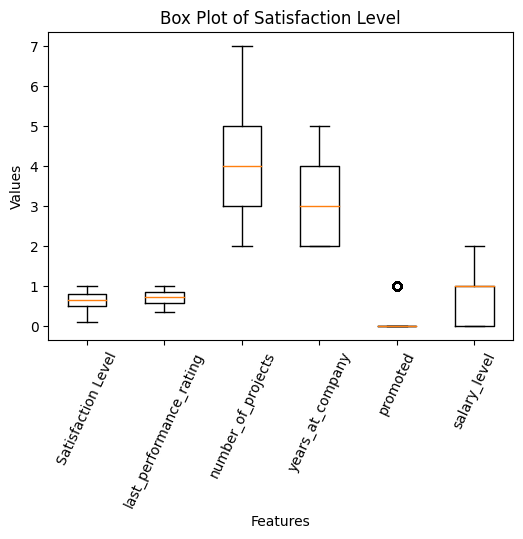

In [26]:
plt.figure(figsize=(6, 4))  # Set figure size
plt.boxplot([data['satisfaction_level'],data['last_performance_rating'],data['number_of_projects'],data['years_at_company'],data['promoted_in_last_5_years'],data['salary_level']])
# Customize the plot
plt.title('Box Plot of Satisfaction Level')  # Set the title
plt.xticks([1,2,3,4,5,6], ['Satisfaction Level', 'last_performance_rating','number_of_projects','years_at_company','promoted', 'salary_level'] ,rotation=65)
plt.xlabel('Features')
plt.ylabel('Values')
#plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11686 entries, 0 to 14985
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        11686 non-null  float64
 1   last_performance_rating   11686 non-null  float64
 2   number_of_projects        11686 non-null  int64  
 3   avg_monthly_hours         11686 non-null  float64
 4   years_at_company          11686 non-null  float64
 5   had_work_accident         11686 non-null  int64  
 6   has_left_company          11686 non-null  int64  
 7   promoted_in_last_5_years  11686 non-null  int64  
 8   Department                11686 non-null  int64  
 9   salary_level              11686 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1004.3 KB


# **Train Model**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = data.drop('has_left_company', axis=1)  # Features (remove target)
y = data['has_left_company']  # Target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9348, 9)
X_test shape: (2338, 9)
y_train shape: (9348,)
y_test shape: (2338,)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Initialize and train the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_decision_tree))


Decision Tree Classifier:
Confusion Matrix:
 [[1899   33]
 [  31  375]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1932
           1       0.92      0.92      0.92       406

    accuracy                           0.97      2338
   macro avg       0.95      0.95      0.95      2338
weighted avg       0.97      0.97      0.97      2338



In [33]:
# Initialize and train the model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_random_forest = random_forest.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))
print("\nClassification Report:\n", classification_report(y_test, y_pred_random_forest))


Random Forest Classifier:
Confusion Matrix:
 [[1928    4]
 [  29  377]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.99      0.93      0.96       406

    accuracy                           0.99      2338
   macro avg       0.99      0.96      0.97      2338
weighted avg       0.99      0.99      0.99      2338



In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [35]:
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [36]:
# Load the trained model
model = joblib.load('model.pkl')
